# Oasis Infobyte (Data Science)
Batch - January Phase 1 AICTE OIB-SIP 2024.

Task 1: Iris Flower Classification

Made By: Ronil Shah

# Problem Statement:

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
iris_df = pd.read_csv("Iris.csv")

In [3]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#Dropping the id column
iris_df.drop('Id', axis = 1, inplace = True)

In [5]:
iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Checking the number of counts of each Species
iris_df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

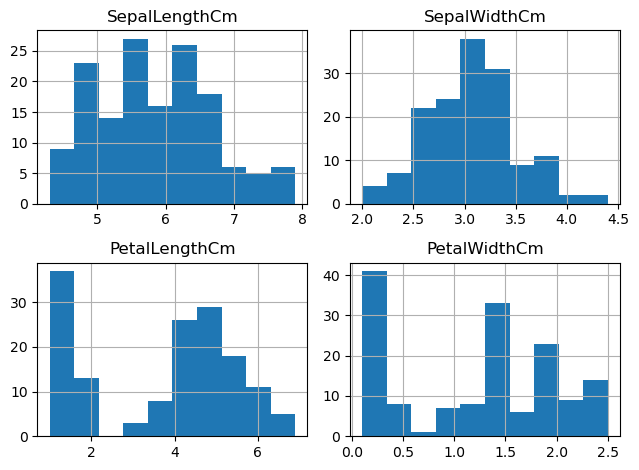

In [10]:
iris_df.hist(linewidth=1.2)
plt.tight_layout()
plt.show()

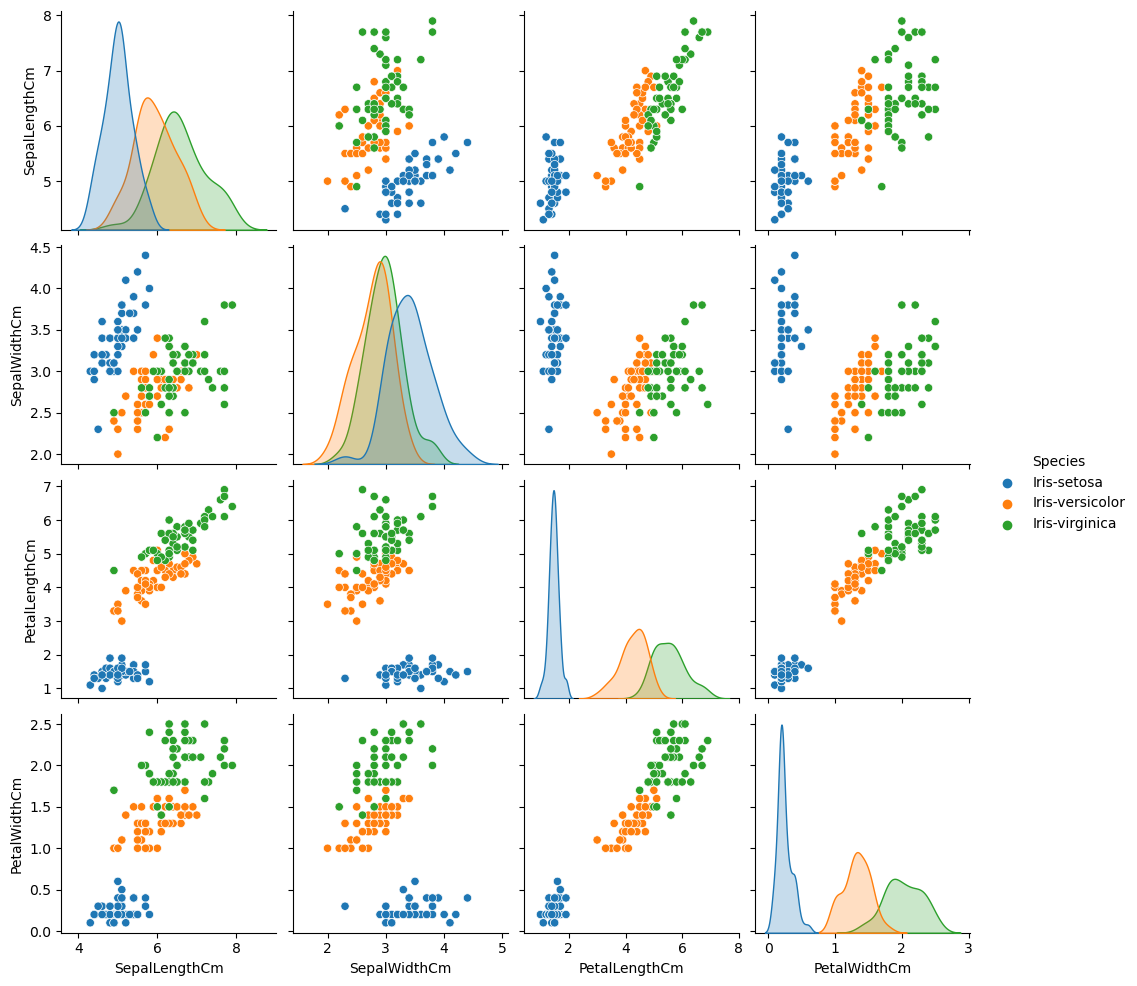

In [11]:
sns.pairplot(iris_df,hue="Species",)

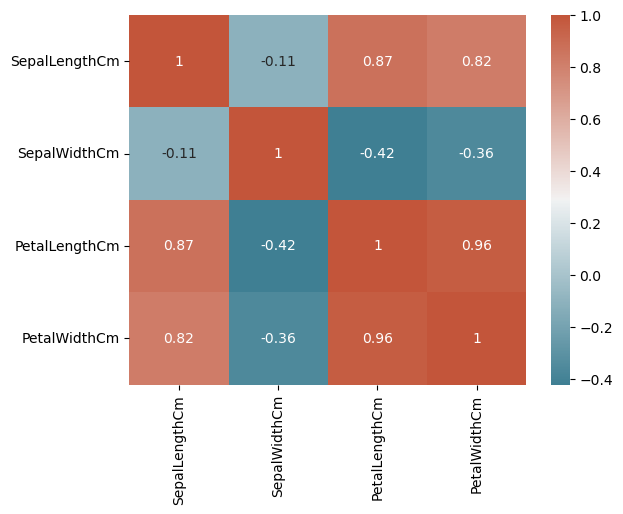

In [12]:
# Drop the non-numeric column 'species'
numeric_df = iris_df.drop(columns=['Species'])

# Create a correlation matrix
correlation_matrix = numeric_df.corr()

# Custom color map
custom_cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plotting heatmap with customized color map
sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap)
plt.show()

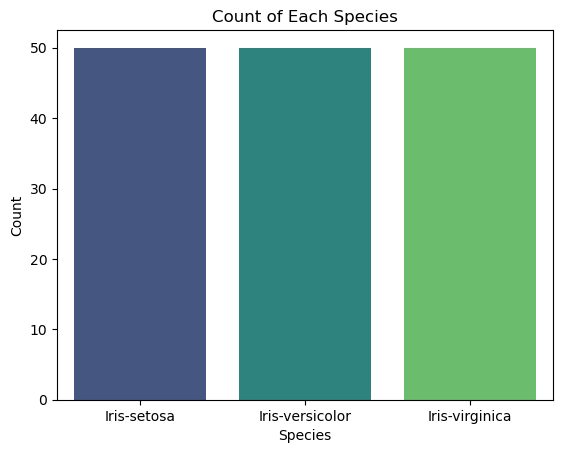

In [13]:
# Get counts of each species
species_counts = iris_df['Species'].value_counts()

# Plotting count plot
sns.barplot(x=species_counts.index, y=species_counts.values, palette="viridis")
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Each Species')
plt.show()

# Treating Outlier data

In [14]:
q1 = iris_df['SepalWidthCm'].quantile(0.25)
q3 = iris_df['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1

In [15]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [16]:
outliers = iris_df[(iris_df['SepalWidthCm'] < lower_bound) | (iris_df['SepalWidthCm'] > upper_bound)]

In [23]:
#Using label encoder for Species column
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris_df['Species'] = encoder.fit_transform(iris_df['Species'])

In [24]:
iris_df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

# Splitting data into training and testing datasets

In [26]:
x = iris_df.drop('Species', axis = 1)
y = iris_df['Species']

In [27]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [30]:
#checking the shape after data-training and data-testing split
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


Standardizing the data:

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Building model

In [32]:
#Importing the metrics required for evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix  

Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 123)
log_reg.fit(x_train, y_train)

LogisticRegression(random_state=123)

In [34]:
#Predicting on train data
y_pred_train = log_reg.predict(x_train)

#Predicting on test data
y_pred_test = log_reg.predict(x_test)

In [37]:
acc_log_train = log_reg.score(x_train, y_train)
acc_log_train

0.9833333333333333

In [36]:
acc_log_test = log_reg.score(x_test, y_test)
acc_log_test

0.9666666666666667

In [38]:
def model_eval(actual, predicted):
    class_rep = classification_report(actual, predicted)
    print(class_rep)

In [39]:
#Training report
print('-----------Training Report-------------')
model_eval(y_pred_train, y_train)

-----------Training Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.95      1.00      0.98        42
           2       1.00      0.95      0.97        41

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [40]:
#Testing report
print('-----------Testing Report-------------')
model_eval(y_pred_test, y_test)

-----------Testing Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.86      0.92         7
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



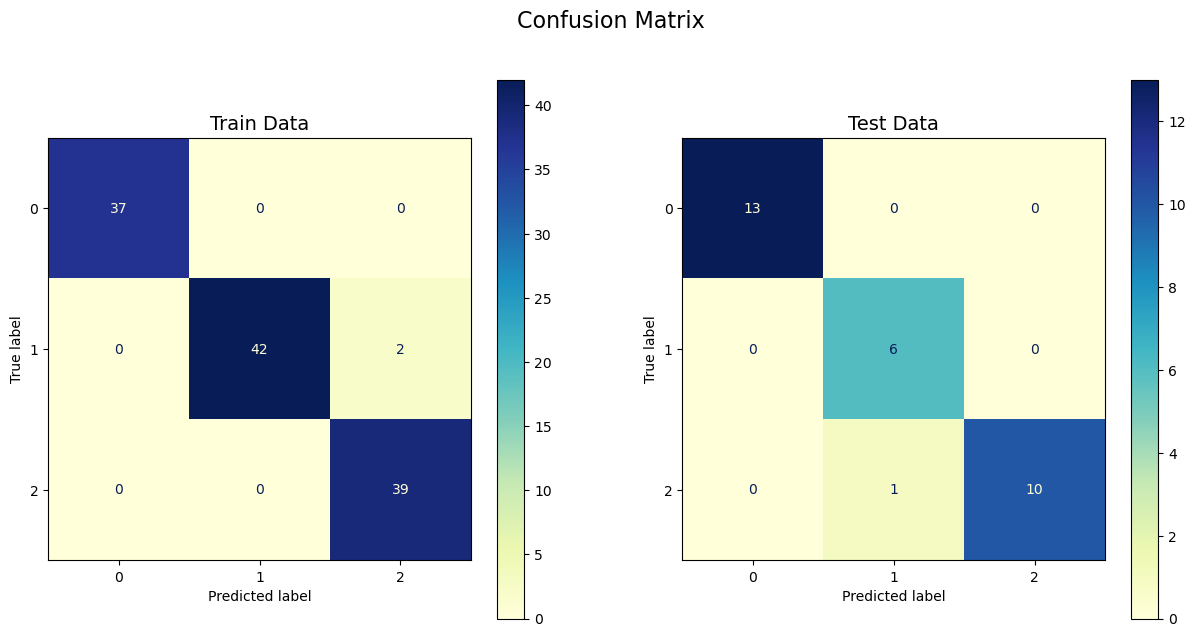

In [41]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=log_reg, X=x_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=log_reg, X=x_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
#Predicting on train data
y_dt_train = dtree.predict(x_train)

#Predicting on test data
y_dt_test = dtree.predict(x_test)

In [44]:
acc_Dtree_train = dtree.score(x_train, y_train)
acc_Dtree_train

1.0

In [45]:
acc_Dtree_test = dtree.score(x_test, y_test)
acc_Dtree_test

1.0

In [46]:
#Training report
print('-----------Training Report-------------')
model_eval(y_dt_train, y_train)

-----------Training Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [47]:
#Testing report
print('-----------Testing Report-------------')
model_eval(y_dt_test, y_test)

-----------Testing Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



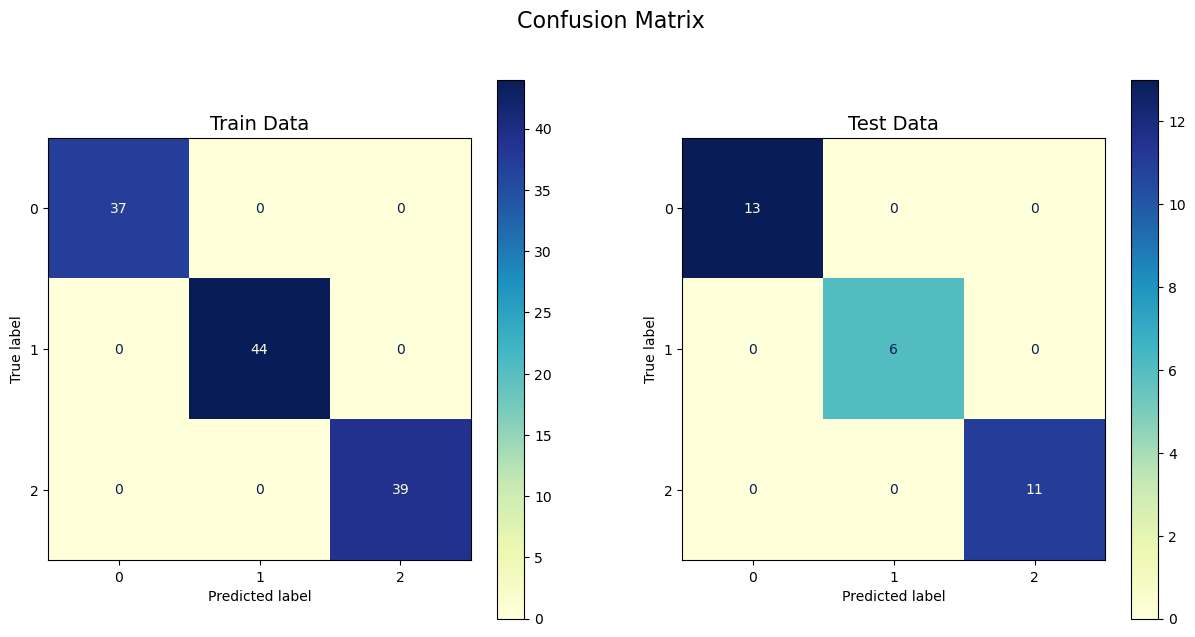

In [48]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=dtree, X=x_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=dtree, X=x_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 45)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=45)

In [53]:
#Predicting on train data
y_rfc_train = rfc.predict(x_train)

#Predicting on test data
y_rfc_test = rfc.predict(x_test)

In [54]:
acc_randForest_train = rfc.score(x_train, y_train)
acc_randForest_train

1.0

In [55]:
acc_randForest_test = rfc.score(x_test, y_test)
acc_randForest_test


1.0

In [56]:
#Training report
print('-----------Training Report-------------')
model_eval(y_rfc_train, y_train)

-----------Training Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [57]:
#Testing report
print('-----------Testing Report-------------')
model_eval(y_rfc_test, y_test)

-----------Testing Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



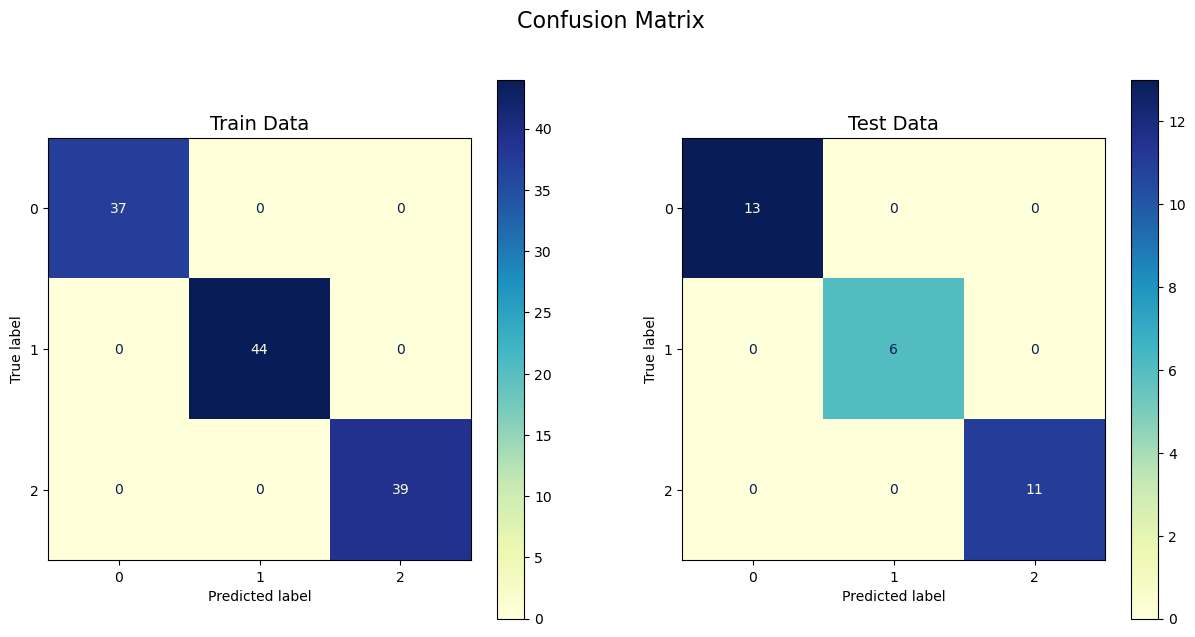

In [58]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=rfc, X=x_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=rfc, X=x_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

K-Nearest Neighbors

In [59]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [60]:
#Predicting on train data
y_knn_train = knn.predict(x_train)

#Predicting on test data
y_knn_test = knn.predict(x_test)

In [61]:
acc_knn_train = knn.score(x_train, y_train)
acc_knn_train

0.975

In [62]:
acc_knn_test = knn.score(x_test, y_test)
acc_knn_test

0.9

In [63]:
#Training report
print('-----------Training Report-------------')
model_eval(y_knn_train, y_train)

-----------Training Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      0.96      0.97        45
           2       0.95      0.97      0.96        38

    accuracy                           0.97       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.97      0.98       120



In [64]:
#Testing report
print('-----------Testing Report-------------')
model_eval(y_knn_test, y_test)

-----------Testing Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.71      0.77         7
           2       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.88      0.87      0.88        30
weighted avg       0.90      0.90      0.90        30



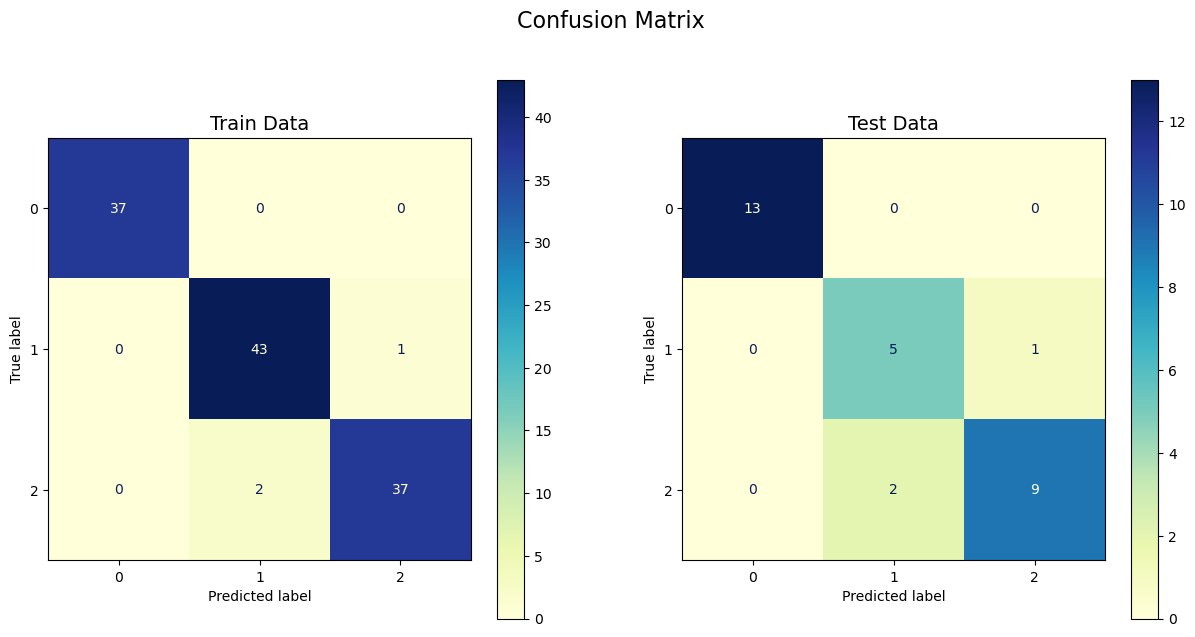

In [65]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=knn, X=x_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=knn, X=x_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()

Comparing scores of different tests on same model

In [66]:
models = pd.DataFrame({ 'Model': ['Logistic Regression', 'Decision Tree Classifier','Random Forest',
                                 'KNeighbors Classifier'],
                      'Training Score': [acc_log_train, acc_Dtree_train, acc_randForest_train, acc_knn_train],
                      'Testing Score': [acc_log_test, acc_Dtree_test, acc_randForest_test, acc_knn_test]})
models.sort_values(by = ['Training Score', 'Testing Score'], ascending = False, ignore_index = True)

,Model,Training Score,Testing Score
0,Decision Tree Classifier,1.000000,1.000000
1,Random Forest,1.000000,1.000000
2,Logistic Regression,0.983333,0.966667
3,KNeighbors Classifier,0.975000,0.900000


Kfold Cross Validation

In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [68]:
classifiers = []

classifiers.append(LogisticRegression(random_state = 123))
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier(random_state = 45))
classifiers.append(KNeighborsClassifier(n_neighbors = 5))

In [69]:
cv_results = []

for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, x_train, y_train, scoring = 'accuracy', cv = 5))

In [70]:
cv_results

[array([1.        , 1.        , 0.875     , 1.        , 0.91666667]),
 array([0.95833333, 1.        , 0.83333333, 1.        , 0.83333333]),
 array([0.95833333, 1.        , 0.83333333, 1.        , 0.83333333]),
 array([1.        , 0.91666667, 1.        , 1.        , 0.875     ])]

In [71]:
cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [72]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm':['Logistic Regression', 'Decision tree Classifier', 'Random Forest Classifiier', 'KNeighbors Classifier']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending  = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.958333,0.052705,Logistic Regression
1,0.958333,0.052705,KNeighbors Classifier
2,0.925000,0.076376,Decision tree Classifier
3,0.925000,0.076376,Random Forest Classifiier


Logistic Regression using GridSearch CV

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
params = {'C': [0.1, 1, 10],
          'penalty': ['l1', 'l2', 'elasticnet']}

In [75]:
lr = LogisticRegression()

In [76]:
grid_search = GridSearchCV(lr, param_grid=params, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [77]:
best_lr = grid_search.best_estimator_

In [78]:
best_lr

LogisticRegression(C=10)

In [79]:
lr = LogisticRegression(C = 10)
lr.fit(x_train, y_train)

LogisticRegression(C=10)

In [80]:
#Predicting on train data
y_lr_train = lr.predict(x_train)

#Predicting on test data
y_lr_test = lr.predict(x_test)

In [81]:
#Training report
print('-----------Training Report-------------')
model_eval(y_lr_train, y_train)

-----------Training Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      0.97      0.99        40

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [82]:
#Testing report
print('-----------Testing Report-------------')
model_eval(y_lr_test, y_test)

-----------Testing Report-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.86      0.92         7
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.95      0.96        30
weighted avg       0.97      0.97      0.97        30



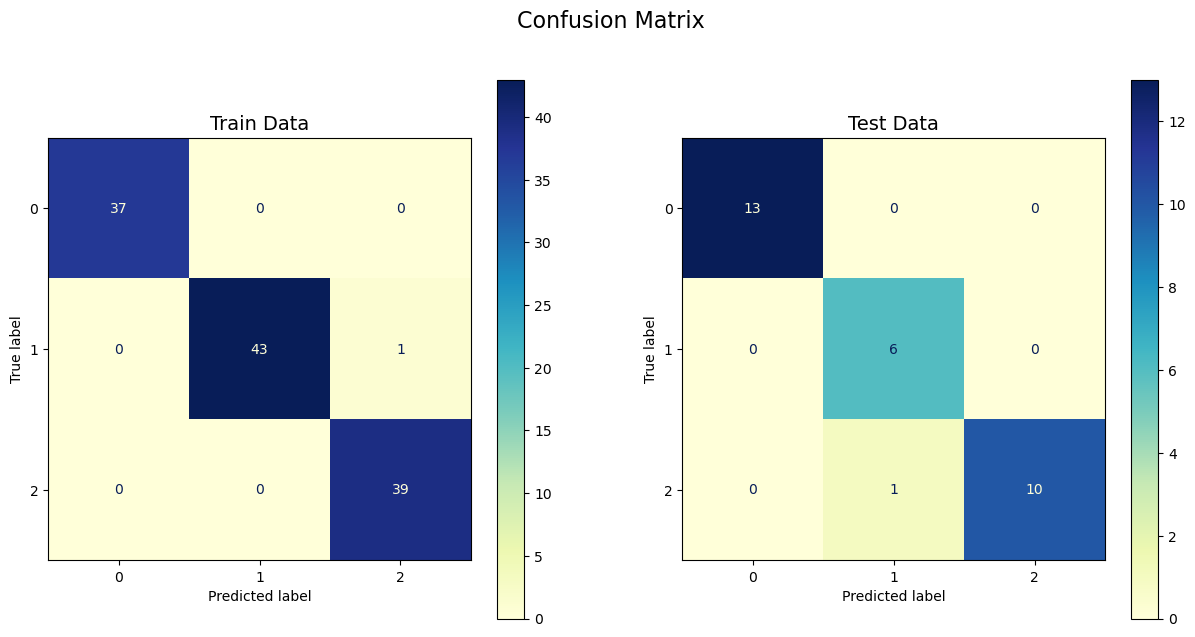

In [83]:
# Plotting confusion maxtrix of train and test data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=lr, X=x_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=lr, X=x_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()